In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
# 1. Create Objects
# 1.1 Creating a Series by passing a list of values, letting pandas create a default integer index:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [70]:
# 1.2 Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [71]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-2.626247,1.108020,1.128036,0.052388
2013-01-02,-0.590381,1.130491,0.868389,0.061185
2013-01-03,0.625606,-1.111774,1.237660,1.176629
2013-01-04,0.542977,-1.045812,0.484730,-0.309092
2013-01-05,0.032324,0.268004,1.279647,0.851834
2013-01-06,1.246384,0.535364,1.259476,1.210642


In [72]:
df2 = pd.DataFrame({'A': 1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([3] * 4, dtype='int32'),
                    'E': pd.Categorical(["test", "train", "test", "train"]),
                    'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [73]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [74]:
# 2. Viewing Data
# 2.1 Basic Selection
df.head(2)

,A,B,C,D
2013-01-01,-2.626247,1.108020,1.128036,0.052388
2013-01-02,-0.590381,1.130491,0.868389,0.061185


In [75]:
df.tail(3)

,A,B,C,D
2013-01-04,0.542977,-1.045812,0.484730,-0.309092
2013-01-05,0.032324,0.268004,1.279647,0.851834
2013-01-06,1.246384,0.535364,1.259476,1.210642


In [76]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [77]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [78]:
df.values

array([[-2.62624743,  1.10802011,  1.12803631,  0.05238775],
       [-0.59038113,  1.13049077,  0.86838941,  0.06118521],
       [ 0.62560649, -1.11177435,  1.23766022,  1.17662867],
       [ 0.54297661, -1.04581238,  0.4847299 , -0.30909248],
       [ 0.03232435,  0.26800404,  1.27964653,  0.85183353],
       [ 1.24638403,  0.53536407,  1.25947584,  1.21064182]])

In [79]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.128223,0.147382,1.042990,0.507264
std,1.370241,1.006339,0.313095,0.653277
min,-2.626247,-1.111774,0.484730,-0.309092
25%,-0.434705,-0.717358,0.933301,0.054587
50%,0.287650,0.401684,1.182848,0.456509
75%,0.604949,0.964856,1.254022,1.095430
max,1.246384,1.130491,1.279647,1.210642


In [80]:
# Transposing your data
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-2.626247,-0.590381,0.625606,0.542977,0.032324,1.246384
B,1.108020,1.130491,-1.111774,-1.045812,0.268004,0.535364
C,1.128036,0.868389,1.237660,0.484730,1.279647,1.259476
D,0.052388,0.061185,1.176629,-0.309092,0.851834,1.210642


In [81]:
# Sorting by an axis
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.052388,1.128036,1.108020,-2.626247
2013-01-02,0.061185,0.868389,1.130491,-0.590381
2013-01-03,1.176629,1.237660,-1.111774,0.625606
2013-01-04,-0.309092,0.484730,-1.045812,0.542977
2013-01-05,0.851834,1.279647,0.268004,0.032324
2013-01-06,1.210642,1.259476,0.535364,1.246384


In [82]:
# Sorting by value
df.sort_values(by='B')

,A,B,C,D
2013-01-03,0.625606,-1.111774,1.237660,1.176629
2013-01-04,0.542977,-1.045812,0.484730,-0.309092
2013-01-05,0.032324,0.268004,1.279647,0.851834
2013-01-06,1.246384,0.535364,1.259476,1.210642
2013-01-01,-2.626247,1.108020,1.128036,0.052388
2013-01-02,-0.590381,1.130491,0.868389,0.061185


In [83]:
# 2.2 Selection
# Recommend the optimized pandas data access methods, .at, .iat, .loc, .iloc and .ix.
# 2.2.1 Get
df['A']

2013-01-01   -2.626247
2013-01-02   -0.590381
2013-01-03    0.625606
2013-01-04    0.542977
2013-01-05    0.032324
2013-01-06    1.246384
Freq: D, Name: A, dtype: float64

In [84]:
df[0:3]

,A,B,C,D
2013-01-01,-2.626247,1.108020,1.128036,0.052388
2013-01-02,-0.590381,1.130491,0.868389,0.061185
2013-01-03,0.625606,-1.111774,1.237660,1.176629


In [85]:
# Select by label
# For getting a cross section using a label
df.loc[dates[0]]

A   -2.626247
B    1.108020
C    1.128036
D    0.052388
Name: 2013-01-01 00:00:00, dtype: float64

In [86]:
# Selecting on a multi-axis by label
df.loc[:,['A','B']]

,A,B
2013-01-01,-2.626247,1.108020
2013-01-02,-0.590381,1.130491
2013-01-03,0.625606,-1.111774
2013-01-04,0.542977,-1.045812
2013-01-05,0.032324,0.268004
2013-01-06,1.246384,0.535364


In [87]:
# Showing label slicing, both endpoints are included
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.590381,1.130491
2013-01-03,0.625606,-1.111774
2013-01-04,0.542977,-1.045812


In [88]:
# Reduction in the dimensions of the returned object
df.loc['20130102',['A','B']]

A   -0.590381
B    1.130491
Name: 2013-01-02 00:00:00, dtype: float64

In [89]:
# For getting a scalar value
df.loc[dates[0],'A']

-2.6262474330613239

In [90]:
# For getting fast access to a scalar (equiv to the prior method)
df.at[dates[0],'A']

-2.6262474330613239

In [91]:
# Selection by Position
# Select via the position of the passed integers
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.542977,-1.045812
2013-01-05,0.032324,0.268004


In [92]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.590381,0.868389
2013-01-03,0.625606,1.237660
2013-01-05,0.032324,1.279647


In [93]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.590381,1.130491,0.868389,0.061185
2013-01-03,0.625606,-1.111774,1.237660,1.176629


In [94]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.108020,1.128036
2013-01-02,1.130491,0.868389
2013-01-03,-1.111774,1.237660
2013-01-04,-1.045812,0.484730
2013-01-05,0.268004,1.279647
2013-01-06,0.535364,1.259476


In [95]:
df.iloc[1,1]

1.130490767885866

In [96]:
df.iat[1,1]

1.130490767885866

In [97]:
# Boolean Indexing
df[df.A > 0]

,A,B,C,D
2013-01-03,0.625606,-1.111774,1.237660,1.176629
2013-01-04,0.542977,-1.045812,0.484730,-0.309092
2013-01-05,0.032324,0.268004,1.279647,0.851834
2013-01-06,1.246384,0.535364,1.259476,1.210642


In [98]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.108020,1.128036,0.052388
2013-01-02,NaN,1.130491,0.868389,0.061185
2013-01-03,0.625606,NaN,1.237660,1.176629
2013-01-04,0.542977,NaN,0.484730,NaN
2013-01-05,0.032324,0.268004,1.279647,0.851834
2013-01-06,1.246384,0.535364,1.259476,1.210642


In [99]:
# Using the isin() method for filtering:
df2 = df.copy()
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-2.626247,1.108020,1.128036,0.052388,one
2013-01-02,-0.590381,1.130491,0.868389,0.061185,one
2013-01-03,0.625606,-1.111774,1.237660,1.176629,two
2013-01-04,0.542977,-1.045812,0.484730,-0.309092,three
2013-01-05,0.032324,0.268004,1.279647,0.851834,four
2013-01-06,1.246384,0.535364,1.259476,1.210642,three


In [100]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.625606,-1.111774,1.237660,1.176629,two
2013-01-05,0.032324,0.268004,1.279647,0.851834,four


In [101]:
## 2.2.2 Setting
# Setting a new column automatically aligns the data by the indexes
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [102]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-2.626247,1.108020,1.128036,0.052388,NaN
2013-01-02,-0.590381,1.130491,0.868389,0.061185,1.0
2013-01-03,0.625606,-1.111774,1.237660,1.176629,2.0
2013-01-04,0.542977,-1.045812,0.484730,-0.309092,3.0
2013-01-05,0.032324,0.268004,1.279647,0.851834,4.0
2013-01-06,1.246384,0.535364,1.259476,1.210642,5.0


In [103]:
# Setting values by label
df.at[dates[0],'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,1.108020,1.128036,0.052388,NaN
2013-01-02,-0.590381,1.130491,0.868389,0.061185,1.0
2013-01-03,0.625606,-1.111774,1.237660,1.176629,2.0
2013-01-04,0.542977,-1.045812,0.484730,-0.309092,3.0
2013-01-05,0.032324,0.268004,1.279647,0.851834,4.0
2013-01-06,1.246384,0.535364,1.259476,1.210642,5.0


In [104]:
# Setting values by position
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.128036,0.052388,NaN
2013-01-02,-0.590381,1.130491,0.868389,0.061185,1.0
2013-01-03,0.625606,-1.111774,1.237660,1.176629,2.0
2013-01-04,0.542977,-1.045812,0.484730,-0.309092,3.0
2013-01-05,0.032324,0.268004,1.279647,0.851834,4.0
2013-01-06,1.246384,0.535364,1.259476,1.210642,5.0


In [105]:
# Setting by assigning with a numpy array
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.128036,5,NaN
2013-01-02,-0.590381,1.130491,0.868389,5,1.0
2013-01-03,0.625606,-1.111774,1.237660,5,2.0
2013-01-04,0.542977,-1.045812,0.484730,5,3.0
2013-01-05,0.032324,0.268004,1.279647,5,4.0
2013-01-06,1.246384,0.535364,1.259476,5,5.0


In [106]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-1.128036,-5,NaN
2013-01-02,-0.590381,-1.130491,-0.868389,-5,-1.0
2013-01-03,-0.625606,-1.111774,-1.237660,-5,-2.0
2013-01-04,-0.542977,-1.045812,-0.484730,-5,-3.0
2013-01-05,-0.032324,-0.268004,-1.279647,-5,-4.0
2013-01-06,-1.246384,-0.535364,-1.259476,-5,-5.0


In [107]:
## 3. Missing Data: 
# pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. 
# Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.128036,5,NaN,1.0
2013-01-02,-0.590381,1.130491,0.868389,5,1.0,1.0
2013-01-03,0.625606,-1.111774,1.237660,5,2.0,NaN
2013-01-04,0.542977,-1.045812,0.484730,5,3.0,NaN


In [108]:
# To drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,-0.590381,1.130491,0.868389,5,1.0,1.0


In [109]:
# Filling missing data
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.128036,5,5.0,1.0
2013-01-02,-0.590381,1.130491,0.868389,5,1.0,1.0
2013-01-03,0.625606,-1.111774,1.237660,5,2.0,5.0
2013-01-04,0.542977,-1.045812,0.484730,5,3.0,5.0


In [110]:
# To get the boolean mask where values are nan
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [111]:
## 4. Operations(Stats / Apply / Histogramming / String Methods)
# 4.1 Stats: Operations in general exclude missing data.
df.mean()

A    0.309485
B   -0.037288
C    1.042990
D    5.000000
F    3.000000
dtype: float64

In [112]:
# Same operation on the other axis
df.mean(1)

2013-01-01    1.532009
2013-01-02    1.481700
2013-01-03    1.550298
2013-01-04    1.596379
2013-01-05    2.115995
2013-01-06    2.608245
Freq: D, dtype: float64

In [113]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [114]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.374394,-2.111774,0.237660,4.0,1.0
2013-01-04,-2.457023,-4.045812,-2.515270,2.0,0.0
2013-01-05,-4.967676,-4.731996,-3.720353,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


In [115]:
# 4.2 Apply: Applying functions to the data
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.128036,5,NaN
2013-01-02,-0.590381,1.130491,1.996426,10,1.0
2013-01-03,0.035225,0.018716,3.234086,15,3.0
2013-01-04,0.578202,-1.027096,3.718816,20,6.0
2013-01-05,0.610526,-0.759092,4.998462,25,10.0
2013-01-06,1.856910,-0.223728,6.257938,30,15.0


In [116]:
df.apply(lambda x: x.max() - x.min())

A    1.836765
B    2.242265
C    0.794917
D    0.000000
F    4.000000
dtype: float64

In [117]:
# 4.3 Histogramming
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    4
2    0
3    1
4    3
5    2
6    1
7    6
8    0
9    3
dtype: int64

In [118]:
s.value_counts()

1    3
3    2
0    2
6    1
4    1
2    1
dtype: int64

In [119]:
# 4.4 String Methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

In [120]:
## 5. Merge(Concat / Join / Append)
# 5.1 Concat:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,1.717394,-1.268303,1.569425,-0.505107
1,-1.491082,-0.045963,-1.161706,1.407148
2,1.098300,-0.594910,0.185118,-0.892381
3,-1.734449,-0.167565,-0.699125,0.104854
4,1.755075,0.495214,1.162626,0.808979
5,0.374534,0.655189,-0.119902,-0.576475
6,1.524317,1.368803,-0.433508,2.382413
7,1.241775,1.311682,0.060730,-1.349071
8,0.253564,0.269521,0.031590,-1.362719
9,0.728698,1.743966,-0.598389,0.295204


In [121]:
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,1.717394,-1.268303,1.569425,-0.505107
1,-1.491082,-0.045963,-1.161706,1.407148
2,1.098300,-0.594910,0.185118,-0.892381
3,-1.734449,-0.167565,-0.699125,0.104854
4,1.755075,0.495214,1.162626,0.808979
5,0.374534,0.655189,-0.119902,-0.576475
6,1.524317,1.368803,-0.433508,2.382413
7,1.241775,1.311682,0.060730,-1.349071
8,0.253564,0.269521,0.031590,-1.362719
9,0.728698,1.743966,-0.598389,0.295204


In [122]:
# 5.2 Join: SQL style merges.
# Example 1:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [123]:
# Example 2:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')


,key,lval,rval
0,foo,1,4
1,bar,2,5


In [125]:
# 5.3 Append: Append rows to a dataframe
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
s = df.iloc[3]
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.980251,1.001553,-0.220372,1.009990
1,0.461655,-1.489267,0.716018,-0.291246
2,-0.699881,-0.030222,1.898270,0.735276
3,-0.775289,-0.888350,-0.199484,-1.009377
4,-0.409747,0.480997,-0.173746,0.618442
5,-0.111934,-0.465566,-0.195180,0.100336
6,-0.550422,1.481721,-0.928354,0.524825
7,0.179334,0.051383,-0.501824,-0.698373
8,-0.775289,-0.888350,-0.199484,-1.009377


In [126]:
## 6. Grouping: By “group by” we are referring to a process involving one or more of the following steps
# Splitting 
# Applying 
# Combining
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                              'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                              'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-1.518728,1.096472
1,bar,one,1.939320,0.596402
2,foo,two,-0.900244,-0.489660
3,bar,three,1.249838,-0.712606
4,foo,two,-0.395647,-0.306338
5,bar,two,-0.768352,0.303104
6,foo,one,0.058898,2.044517
7,foo,three,-0.538980,1.364272


In [127]:
df.groupby('A').sum()

,C,D
A,,
bar,2.420806,0.186900
foo,-3.294701,3.709263


In [128]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    1.939320  0.596402
    three  1.249838 -0.712606
    two   -0.768352  0.303104
foo one   -1.459830  3.140988
    three -0.538980  1.364272
    two   -1.295891 -0.795998

In [129]:
## 7. Resharping: Stack / Pivot Tables
# 7.1 Stack
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.986487  0.183452
      two    -0.328366 -0.129874
baz   one    -1.212618 -0.414490
      two    -1.744083 -1.392349

In [130]:
# The stack() method “compresses” a level in the DataFrame’s columns.
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.986487
               B    0.183452
       two     A   -0.328366
               B   -0.129874
baz    one     A   -1.212618
               B   -0.414490
       two     A   -1.744083
               B   -1.392349
dtype: float64

In [131]:
stacked.unstack()

A         B
first second                    
bar   one    -0.986487  0.183452
      two    -0.328366 -0.129874
baz   one    -1.212618 -0.414490
      two    -1.744083 -1.392349

In [132]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.986487 -0.328366
      B  0.183452 -0.129874
baz   A -1.212618 -1.744083
      B -0.414490 -1.392349

In [133]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.986487 -1.212618
       B  0.183452 -0.414490
two    A -0.328366 -1.744083
       B -0.129874 -1.392349

In [134]:
# 7.2 Pivot Tables
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                       'B' : ['A', 'B', 'C'] * 4,
                       'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                       'D' : np.random.randn(12),
                       'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-1.069053,-0.352472
1,one,B,foo,0.856788,-0.330801
2,two,C,foo,-0.301973,0.819376
3,three,A,bar,0.670268,0.057538
4,one,B,bar,-0.430468,0.596050
5,one,C,bar,0.485296,0.693621
6,two,A,foo,1.023295,-0.599150
7,three,B,foo,0.866180,0.964077
8,one,C,foo,1.280338,-1.651447
9,one,A,bar,-1.888037,1.625295


In [135]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.888037 -1.069053
      B -0.430468  0.856788
      C  0.485296  1.280338
three A  0.670268       NaN
      B       NaN  0.866180
      C  1.210419       NaN
two   A       NaN  1.023295
      B  1.467745       NaN
      C       NaN -0.301973

In [136]:
# 8. Time Series: pandas has simple, powerful, and efficient functionality for performing resampling 
# operations during frequency conversion
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

2012-01-01    22940
Freq: 5T, dtype: int64

In [137]:
# Time zone representation
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts

2012-03-06   -0.098275
2012-03-07    0.310373
2012-03-08   -0.152845
2012-03-09    0.024017
2012-03-10    0.030223
Freq: D, dtype: float64

In [138]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.098275
2012-03-07 00:00:00+00:00    0.310373
2012-03-08 00:00:00+00:00   -0.152845
2012-03-09 00:00:00+00:00    0.024017
2012-03-10 00:00:00+00:00    0.030223
Freq: D, dtype: float64

In [139]:
# Convert to another time zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.098275
2012-03-06 19:00:00-05:00    0.310373
2012-03-07 19:00:00-05:00   -0.152845
2012-03-08 19:00:00-05:00    0.024017
2012-03-09 19:00:00-05:00    0.030223
Freq: D, dtype: float64

In [140]:
# Converting between time span representations
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ps = ts.to_period()
ps

2012-01   -0.533353
2012-02    1.736369
2012-03    0.931364
2012-04    0.886535
2012-05    1.083678
Freq: M, dtype: float64

In [141]:
ps.to_timestamp()

2012-01-01   -0.533353
2012-02-01    1.736369
2012-03-01    0.931364
2012-04-01    0.886535
2012-05-01    1.083678
Freq: MS, dtype: float64

In [142]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts.head()

1990-03-01 09:00    0.208515
1990-06-01 09:00   -0.859128
1990-09-01 09:00   -1.543749
1990-12-01 09:00    0.089887
1991-03-01 09:00    2.132641
Freq: H, dtype: float64

In [143]:
## 9. Categoricals: pandas can include categorical data in a DataFrame. 
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [145]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (3, object): [very good, good, very bad]

In [146]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [147]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [148]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

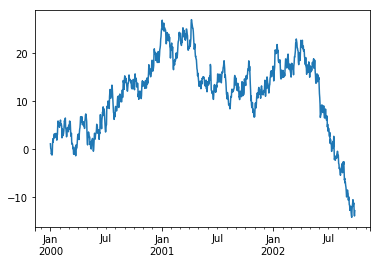

In [149]:
## 10. Plot
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

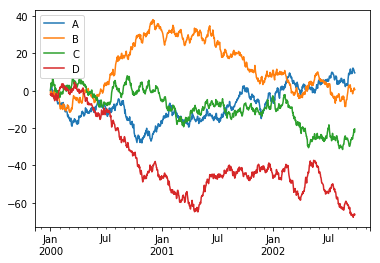

In [150]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D']) 
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

In [151]:
## 11. Getting Data In/Out
#CSV
df.to_csv('files/foo.csv')

In [152]:
pd.read_csv('files/foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.102412,-0.704147,0.433011,-2.027553
1,2000-01-02,-0.352271,-2.267091,1.845067,-2.397708
2,2000-01-03,-1.332428,-0.246052,4.078518,-2.607361
3,2000-01-04,0.974070,-0.173575,3.334204,-1.525464
4,2000-01-05,2.010366,-1.248014,3.984766,-2.670127
5,2000-01-06,-0.440048,-2.284813,2.259667,-2.978215
6,2000-01-07,0.435709,-2.095699,3.837345,-1.704183
7,2000-01-08,-0.139858,-2.921210,6.343277,-1.490498
8,2000-01-09,0.046102,-1.265336,5.752347,-2.307773
9,2000-01-10,-1.323859,-1.564844,5.750268,-2.902527


In [154]:
df.to_hdf('files/foo.h5','df')

In [155]:
pd.read_hdf('files/foo.h5','df')

,A,B,C,D
2000-01-01,0.102412,-0.704147,0.433011,-2.027553
2000-01-02,-0.352271,-2.267091,1.845067,-2.397708
2000-01-03,-1.332428,-0.246052,4.078518,-2.607361
2000-01-04,0.974070,-0.173575,3.334204,-1.525464
2000-01-05,2.010366,-1.248014,3.984766,-2.670127
2000-01-06,-0.440048,-2.284813,2.259667,-2.978215
2000-01-07,0.435709,-2.095699,3.837345,-1.704183
2000-01-08,-0.139858,-2.921210,6.343277,-1.490498
2000-01-09,0.046102,-1.265336,5.752347,-2.307773
2000-01-10,-1.323859,-1.564844,5.750268,-2.902527


In [156]:
df.to_excel('files/foo.xlsx', sheet_name='Sheet1')

In [158]:
pd.read_excel('files/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

,A,B,C,D
2000-01-01,0.102412,-0.704147,0.433011,-2.027553
2000-01-02,-0.352271,-2.267091,1.845067,-2.397708
2000-01-03,-1.332428,-0.246052,4.078518,-2.607361
2000-01-04,0.974070,-0.173575,3.334204,-1.525464
2000-01-05,2.010366,-1.248014,3.984766,-2.670127
2000-01-06,-0.440048,-2.284813,2.259667,-2.978215
2000-01-07,0.435709,-2.095699,3.837345,-1.704183
2000-01-08,-0.139858,-2.921210,6.343277,-1.490498
2000-01-09,0.046102,-1.265336,5.752347,-2.307773
2000-01-10,-1.323859,-1.564844,5.750268,-2.902527
